In [17]:
import pandas as pd
import numpy as np

# Replace with your actual file name and path
df = pd.read_excel("Dirty Dataset Practice - Meal Survey Jess Ramos.xlsx")

df.head()  # optional: shows the first few rows



,OrderID,FirstName,LastName,Gender,PhoneNumber,Address,Age,LunchOrder,ItemsOrdered,MealRating0-5,MealCostEstimated
0,123,Jenny,Smith,F,770-123-4567,"123 Sunshine Rd. Atlanta, GA 30033",350,"Pizza, Salad, & Soda",3,4.5,30.0
1,456,JERRY,LEE,M,111-2345,"2333 Apricot St. ATL, Georgia 30033",56,Pizza/Water,2,3.0,14.0
2,789,leonard,NaN,NaN,(303) 567-8910,"909 club dr. atlanta, 30033",19,Pizza,1,5.0,33.0
3,98,Brad,Johnson,Male,2223456789,1344 Canvas Circle ATL,26,Salad & Soda,2,10.0,15.5
4,765,Juan,Fernandez,male,111111111,NaN,20,water and pizza,2,5.0,18.0


In [18]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())


Shape: (21, 11)

Columns: ['OrderID', 'FirstName', 'LastName', 'Gender', 'PhoneNumber', 'Address', 'Age', 'LunchOrder', 'ItemsOrdered', 'MealRating0-5', 'MealCostEstimated']

Missing values:
 OrderID              0
FirstName            1
LastName             3
Gender               3
PhoneNumber          4
Address              6
Age                  1
LunchOrder           0
ItemsOrdered         0
MealRating0-5        1
MealCostEstimated    3
dtype: int64


In [19]:
print("\nInfo:")
df.info()
print("\nDescribe:")
df.describe()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OrderID            21 non-null     int64  
 1   FirstName          20 non-null     object 
 2   LastName           18 non-null     object 
 3   Gender             18 non-null     object 
 4   PhoneNumber        17 non-null     object 
 5   Address            15 non-null     object 
 6   Age                20 non-null     object 
 7   LunchOrder         21 non-null     object 
 8   ItemsOrdered       21 non-null     int64  
 9   MealRating0-5      20 non-null     float64
 10  MealCostEstimated  18 non-null     float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.9+ KB

Describe:


,OrderID,ItemsOrdered,MealRating0-5,MealCostEstimated
count,21.000000,21.000000,20.000000,18.000000
mean,521.666667,2.095238,4.125000,72.250000
std,283.703249,0.889087,1.890941,231.677784
min,98.000000,1.000000,1.000000,0.000000
25%,234.000000,2.000000,3.375000,14.000000
50%,568.000000,2.000000,4.250000,17.500000
75%,765.000000,2.000000,5.000000,23.750000
max,985.000000,4.000000,10.000000,1000.000000


In [20]:
print(df['Gender'].value_counts(dropna=False))


Gender
F         5
NaN       3
Female    3
Male      2
M         2
male      2
f         2
m         1
female    1
Name: count, dtype: int64


In [21]:
print(df['MealCostEstimated'].describe())


count      18.000000
mean       72.250000
std       231.677784
min         0.000000
25%        14.000000
50%        17.500000
75%        23.750000
max      1000.000000
Name: MealCostEstimated, dtype: float64


In [10]:
df_filtered = df[(df['MealCostEstimated'] > 0) & (df['MealCostEstimated'] < 100)]


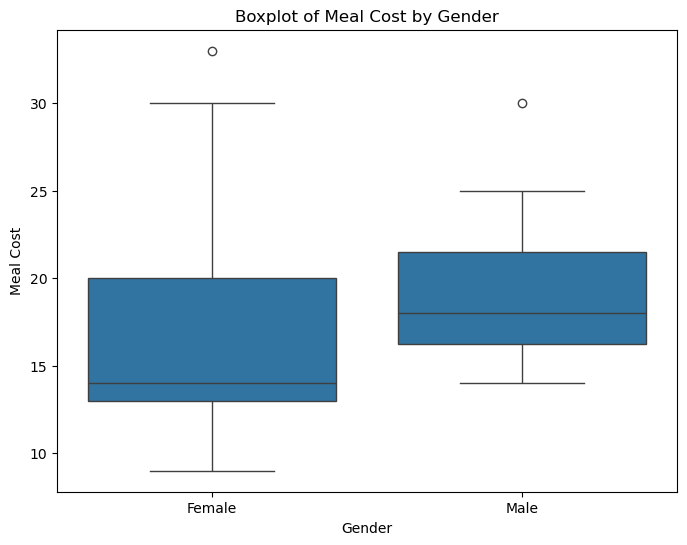

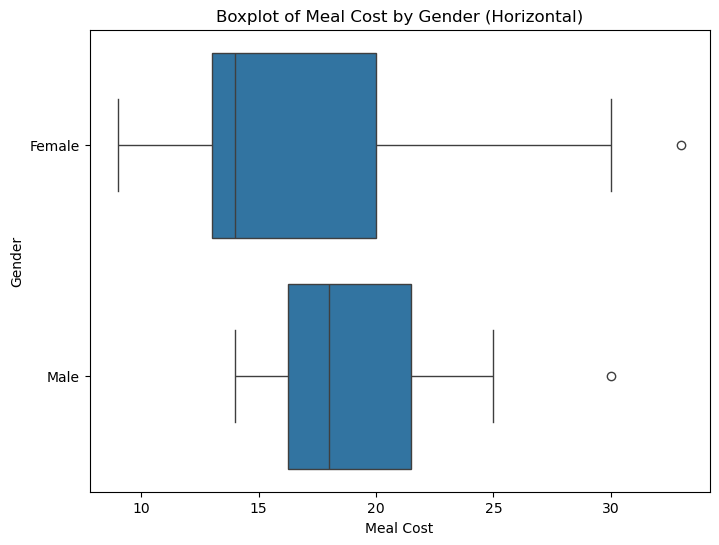

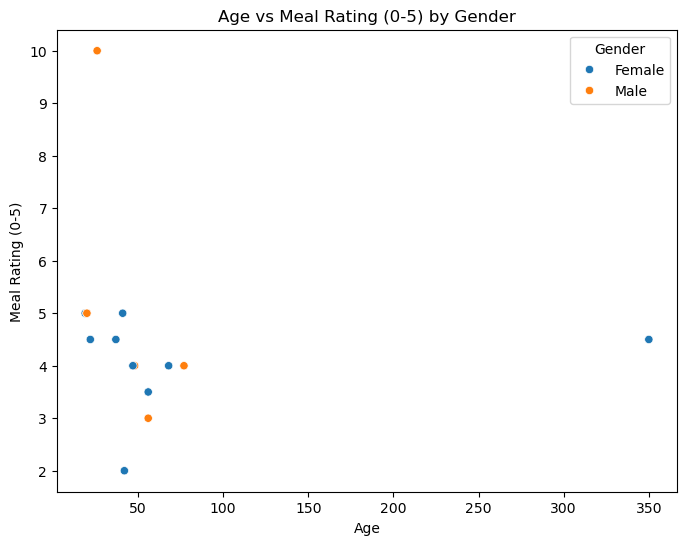

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 🔹 Load your dataset (change the filename if needed)
df = pd.read_excel("Dirty Dataset Practice - Meal Survey Jess Ramos.xlsx")

# 🔧 Step 1: Normalize the 'Gender' column
df['Gender'] = df['Gender'].astype(str).str.strip().str.lower()

# 🔧 Step 2: Map gender strings to 0 (Female) and 1 (Male)
gender_map = {
    'female': 0, 'f': 0,
    'male': 1, 'm': 1,
    '0': 0, '1': 1
}
df['Gender'] = df['Gender'].map(gender_map)

# 🔧 Step 3: Fill any NaNs in Gender with random 0 or 1
df.loc[df['Gender'].isna(), 'Gender'] = np.random.choice([0, 1], size=df['Gender'].isna().sum())

# 🔧 Step 4: Convert to int
df['Gender'] = df['Gender'].astype(int)

# 🧼 Optional: Filter out extreme MealCostEstimated values for better plot readability
df = df[(df['MealCostEstimated'] > 0) & (df['MealCostEstimated'] < 100)]

# 🔷 Plot 1: Vertical Boxplot — MealCostEstimated by Gender
df_plot = df[['Gender', 'MealCostEstimated']].dropna().copy()
df_plot['Gender'] = df_plot['Gender'].map({0: 'Female', 1: 'Male'})

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_plot, x='Gender', y='MealCostEstimated')
plt.title('Boxplot of Meal Cost by Gender')
plt.xlabel('Gender')
plt.ylabel('Meal Cost')
plt.show()

# 🔷 Plot 2: Horizontal Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_plot, y='Gender', x='MealCostEstimated')
plt.title('Boxplot of Meal Cost by Gender (Horizontal)')
plt.ylabel('Gender')
plt.xlabel('Meal Cost')
plt.show()

# 🔧 Clean Age and MealRating0-5 columns
df['Age'] = df['Age'].astype(str).str.extract(r'(\d+\.?\d*)')  # Extract numeric part
df['MealRating0-5'] = df['MealRating0-5'].astype(str).str.extract(r'(\d+\.?\d*)')

# 🔧 Convert to numeric (coerce invalids to NaN)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['MealRating0-5'] = pd.to_numeric(df['MealRating0-5'], errors='coerce')

# 🔧 Drop any remaining NaNs for scatter plot
df_clean = df[['Gender', 'Age', 'MealRating0-5']].dropna().copy()
df_clean['Gender'] = df_clean['Gender'].map({0: 'Female', 1: 'Male'})

# 🔷 Plot 3: Scatter Plot — Age vs MealRating0-5 by Gender
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='Age', y='MealRating0-5', hue='Gender')
plt.title('Age vs Meal Rating (0-5) by Gender')
plt.xlabel('Age')
plt.ylabel('Meal Rating (0-5)')
plt.legend(title='Gender')
plt.show()
